## Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score
from scipy import stats

from tensorflow.keras.preprocessing.image import load_img, img_to_array,ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D,AveragePooling2D
from tensorflow.keras.models import Model,Sequential,load_model
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.callbacks import TensorBoard,ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


Init Plugin
Init Graph Optimizer
Init Kernel


## Displaying Images

In [2]:
picture_size = 48
folder_path = "/Users/praneeth44/OneDrive - Indiana University/IU/AML/Project/FER 2013/archive/"

## Making Training and Validation Data

In [3]:
batch_size  = 100

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"test",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## Model Building

In [14]:
no_of_classes = 7

AlexNet = Sequential()

#1st CNN layer
AlexNet.add(Conv2D(96,11,strides=1,input_shape = (48,48,1)))
# AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size = (3,2)))
# AlexNet.add(Dropout(0.25))

#2nd CNN layer
AlexNet.add(Conv2D(256,5,strides=1,padding = 'same'))
# AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size = (3,2)))
# AlexNet.add(Dropout (0.25))

#3rd CNN layer
AlexNet.add(Conv2D(384,3,strides=1,padding = 'same'))
# AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size = (3,2)))
# AlexNet.add(Dropout (0.25))

#4th CNN layer
AlexNet.add(Conv2D(256,3,strides=1,padding = 'same'))
# AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# AlexNet.add(MaxPooling2D(pool_size=(3, 2)))
# AlexNet.add(Dropout(0.25))

AlexNet.add(Flatten())

#Fully connected 1st layer
AlexNet.add(Dense(4096))
# AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(Dropout(0.5))

#Fully connected 2nd layer
AlexNet.add(Dense(4096))
# AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(Dropout(0.5))


# # Fully connected 3rd layer
# AlexNet.add(Dense(512))
# AlexNet.add(BatchNormalization())
# AlexNet.add(Activation('relu'))
# AlexNet.add(Dropout(0.25))

AlexNet.add(Dense(no_of_classes, activation='softmax'))



opt = SGD(lr = 0.0001)
AlexNet.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
AlexNet.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 38, 38, 96)        11712     
_________________________________________________________________
activation_36 (Activation)   (None, 38, 38, 96)        0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 12, 19, 96)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 12, 19, 256)       614656    
_________________________________________________________________
activation_37 (Activation)   (None, 12, 19, 256)       0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 4, 9, 256)         0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 4, 9, 384)        

## Fitting the Model with Training and Validation Data

In [15]:

checkpoint = ModelCheckpoint(filepath="/Users/praneeth44/OneDrive - Indiana University/IU/AML/Project/FER 2013/archive/AlexNet.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=20,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 100

AlexNet.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [16]:
history = AlexNet.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/100


2021-12-14 11:49:27.888639: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


287/287 [==============================] - ETA: 0s - loss: 2.0641 - accuracy: 0.2719

2021-12-14 11:50:20.498165: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


287/287 [==============================] - 56s 194ms/step - loss: 2.0641 - accuracy: 0.2719 - val_loss: 1.6689 - val_accuracy: 0.3315

Epoch 00001: val_accuracy improved from -inf to 0.33155, saving model to /Users/praneeth44/OneDrive - Indiana University/IU/AML/Project/FER 2013/archive/AlexNet.h5
Epoch 2/100
287/287 [==============================] - 56s 193ms/step - loss: 1.6541 - accuracy: 0.3437 - val_loss: 1.5858 - val_accuracy: 0.3835

Epoch 00002: val_accuracy improved from 0.33155 to 0.38352, saving model to /Users/praneeth44/OneDrive - Indiana University/IU/AML/Project/FER 2013/archive/AlexNet.h5
Epoch 3/100
287/287 [==============================] - 55s 190ms/step - loss: 1.5632 - accuracy: 0.3868 - val_loss: 1.5322 - val_accuracy: 0.3989

Epoch 00003: val_accuracy improved from 0.38352 to 0.39887, saving model to /Users/praneeth44/OneDrive - Indiana University/IU/AML/Project/FER 2013/archive/AlexNet.h5
Epoch 4/100
287/287 [==============================] - 55s 191ms/step - l

## Plotting Accuracy & Loss

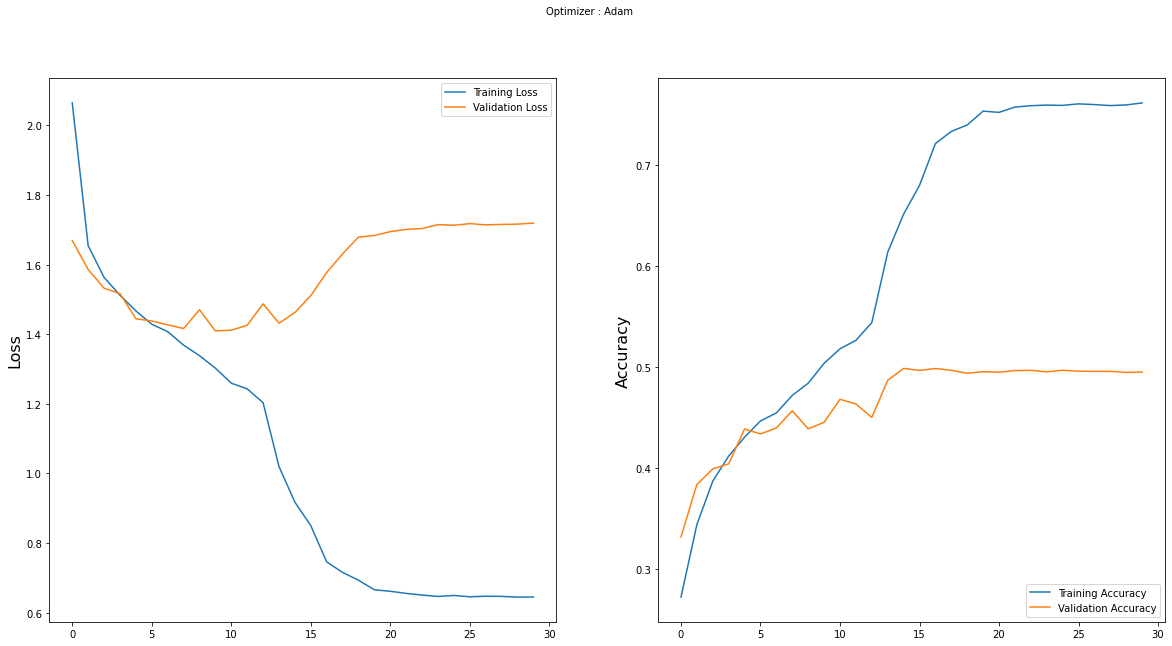

In [28]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

## Tesing with total test data

In [29]:
emotion_labels = ['Angry','Disgust','Fear','Happy','Neutral', 'Sad', 'Surprise']

In [30]:
df = pd.read_csv('/Users/praneeth44/OneDrive - Indiana University/IU/AML/Project/FER 2013/fer2013_Modified.csv')
df

,emotion,Usage,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,...,p_2295,p_2296,p_2297,p_2298,p_2299,p_2300,p_2301,p_2302,p_2303,p_2304
0,0,Training,70,80,82,72,58,58,60,63,...,159,182,183,136,106,116,95,106,109,82
1,0,Training,151,150,147,155,148,133,111,140,...,105,108,95,108,102,67,171,193,183,184
2,2,Training,231,212,156,164,174,138,161,173,...,104,138,152,122,114,101,97,88,110,152
3,4,Training,24,32,36,30,32,23,19,20,...,174,126,132,132,133,136,139,142,143,142
4,6,Training,4,0,0,0,0,0,0,0,...,12,34,31,31,31,27,31,30,29,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35882,6,PrivateTest,50,36,17,22,23,29,33,39,...,216,215,216,217,221,222,220,223,221,216
35883,3,PrivateTest,178,174,172,173,181,188,191,194,...,147,141,136,118,66,7,0,0,0,0
35884,0,PrivateTest,17,17,16,23,28,22,19,17,...,190,179,193,193,194,170,148,154,133,113
35885,3,PrivateTest,30,28,28,29,31,30,42,68,...,30,27,27,26,28,35,35,35,30,28


In [31]:
df_test=df[df['Usage'].isin(['PrivateTest'])].reset_index()
df_test

,index,emotion,Usage,p_1,p_2,p_3,p_4,p_5,p_6,p_7,...,p_2295,p_2296,p_2297,p_2298,p_2299,p_2300,p_2301,p_2302,p_2303,p_2304
0,32298,0,PrivateTest,170,118,101,88,88,75,78,...,210,210,222,222,204,190,174,159,133,131
1,32299,5,PrivateTest,7,5,8,6,7,3,2,...,41,37,76,88,84,88,82,72,57,52
2,32300,6,PrivateTest,232,240,241,239,237,235,246,...,64,21,89,68,46,67,2,4,4,9
3,32301,4,PrivateTest,200,197,149,139,156,89,111,...,142,161,185,185,107,146,144,149,33,0
4,32302,2,PrivateTest,40,28,33,56,45,33,31,...,25,26,29,26,28,25,24,24,29,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3584,35882,6,PrivateTest,50,36,17,22,23,29,33,...,216,215,216,217,221,222,220,223,221,216
3585,35883,3,PrivateTest,178,174,172,173,181,188,191,...,147,141,136,118,66,7,0,0,0,0
3586,35884,0,PrivateTest,17,17,16,23,28,22,19,...,190,179,193,193,194,170,148,154,133,113
3587,35885,3,PrivateTest,30,28,28,29,31,30,42,...,30,27,27,26,28,35,35,35,30,28


In [32]:
y_true = df_test['emotion'].to_numpy()
y_true

array([0, 5, 6, ..., 0, 3, 2])

In [33]:
df_test_x = df_test.drop(['index','emotion','Usage'],axis=1)
df_test_x

,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,...,p_2295,p_2296,p_2297,p_2298,p_2299,p_2300,p_2301,p_2302,p_2303,p_2304
0,170,118,101,88,88,75,78,82,66,74,...,210,210,222,222,204,190,174,159,133,131
1,7,5,8,6,7,3,2,6,5,4,...,41,37,76,88,84,88,82,72,57,52
2,232,240,241,239,237,235,246,117,24,24,...,64,21,89,68,46,67,2,4,4,9
3,200,197,149,139,156,89,111,58,62,95,...,142,161,185,185,107,146,144,149,33,0
4,40,28,33,56,45,33,31,78,152,194,...,25,26,29,26,28,25,24,24,29,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3584,50,36,17,22,23,29,33,39,34,37,...,216,215,216,217,221,222,220,223,221,216
3585,178,174,172,173,181,188,191,194,196,199,...,147,141,136,118,66,7,0,0,0,0
3586,17,17,16,23,28,22,19,17,25,26,...,190,179,193,193,194,170,148,154,133,113
3587,30,28,28,29,31,30,42,68,79,81,...,30,27,27,26,28,35,35,35,30,28


In [34]:
test = df_test_x.values.reshape(-1,48,48,1).astype('float32')

In [35]:
y_pred=AlexNet.predict(test).argmax(axis=1)

In [36]:
cm=confusion_matrix(y_true, y_pred)
cm

array([[251,   0,  32,  73,  65,  51,  19],
       [ 43,   0,   1,   4,   2,   3,   2],
       [151,   0,  75,  68,  71,  81,  82],
       [ 86,   0,  21, 658,  48,  44,  22],
       [171,   0,  23, 110, 126, 140,  24],
       [ 31,   0,  35,  46,  30,  14, 260],
       [155,   0,  19, 106, 252,  63,  31]])

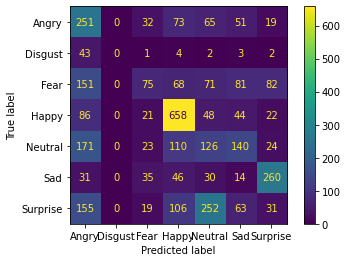

<Figure size 1440x720 with 0 Axes>

In [37]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=emotion_labels)
disp.plot()
plt.figure(figsize=(20,10))
plt.show()

In [38]:
accuracy_score(y_true, y_pred)

0.3218166620228476